마키아벨리니즘 심리테스트를 활용하여 테스트 참가자의 국가 선거 투표 여부 예측

**변수 설명**
- 주소:https://dacon.io/competitions/official/235647/talkboard/401534?page=1&dtype=recent

**마키아벨리니즘 심리테스트 한국어 설명**
 - 주소:https://m.blog.naver.com/PostView.naver?blogId=wlgid0727&logNo=220723273746&proxyReferer=http:%2F%2F210.117.121.211%2F

**데이콘 토론 마키아벨리니즘 테스트 스코어 계산법**
- 주소: https://dacon.io/competitions/official/235647/talkboard/401557?page=1&dtype=recent&ptype=pub



**심사 기준: AUC**
- 이진 분류기(binary classifier)는 양성과 음성, 1과 0, +와 -, 앞과 뒤와 같이 두 가지의 클래스를 분류할 수 있는 분류기
- 이진 분류기의 성능을 평가하는데 사용되는 것 중 하나가 AUC


데이콘 코드 공유 NN 모델 
  - 주소: https://dacon.io/competitions/official/235647/codeshare/1758?page=1&dtype=recent&ptype=pb

데이콘 토론 마키아벨리니즘 테스트 스코어 계산법 설명
   - 주소: https://dacon.io/competitions/official/235647/codeshare/1711?page=1&dtype=recent&ptype=pub
   


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
train = pd.read_csv('/content/drive/MyDrive/open data/train.csv')
test= pd.read_csv('/content/drive/MyDrive/open data/test_x.csv')
submission=pd.read_csv('/content/drive/MyDrive/open data/sample_submission.csv')

# 데이터 불러오기



# train_data = pd.read_csv(path + 'train.csv').drop([379, 24598], axis=0)




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import random
from datetime import datetime

import numpy as np
import pandas as pd
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from IPython.display import Image


- 부호 column 같은 경우 +이면 답변값이 높을수록 마키아벨리니즘 성향이 높은 것이고 -이면 답변값이 낮을수록 마키아벨리니즘 성향이 높은 것입니다.

마키아벨리아니즘 테스트 스코어는 -부호를 가진 문항들의 답변값을 reverse 시키고 모든 문항의 답변들의 평균을 구한 것

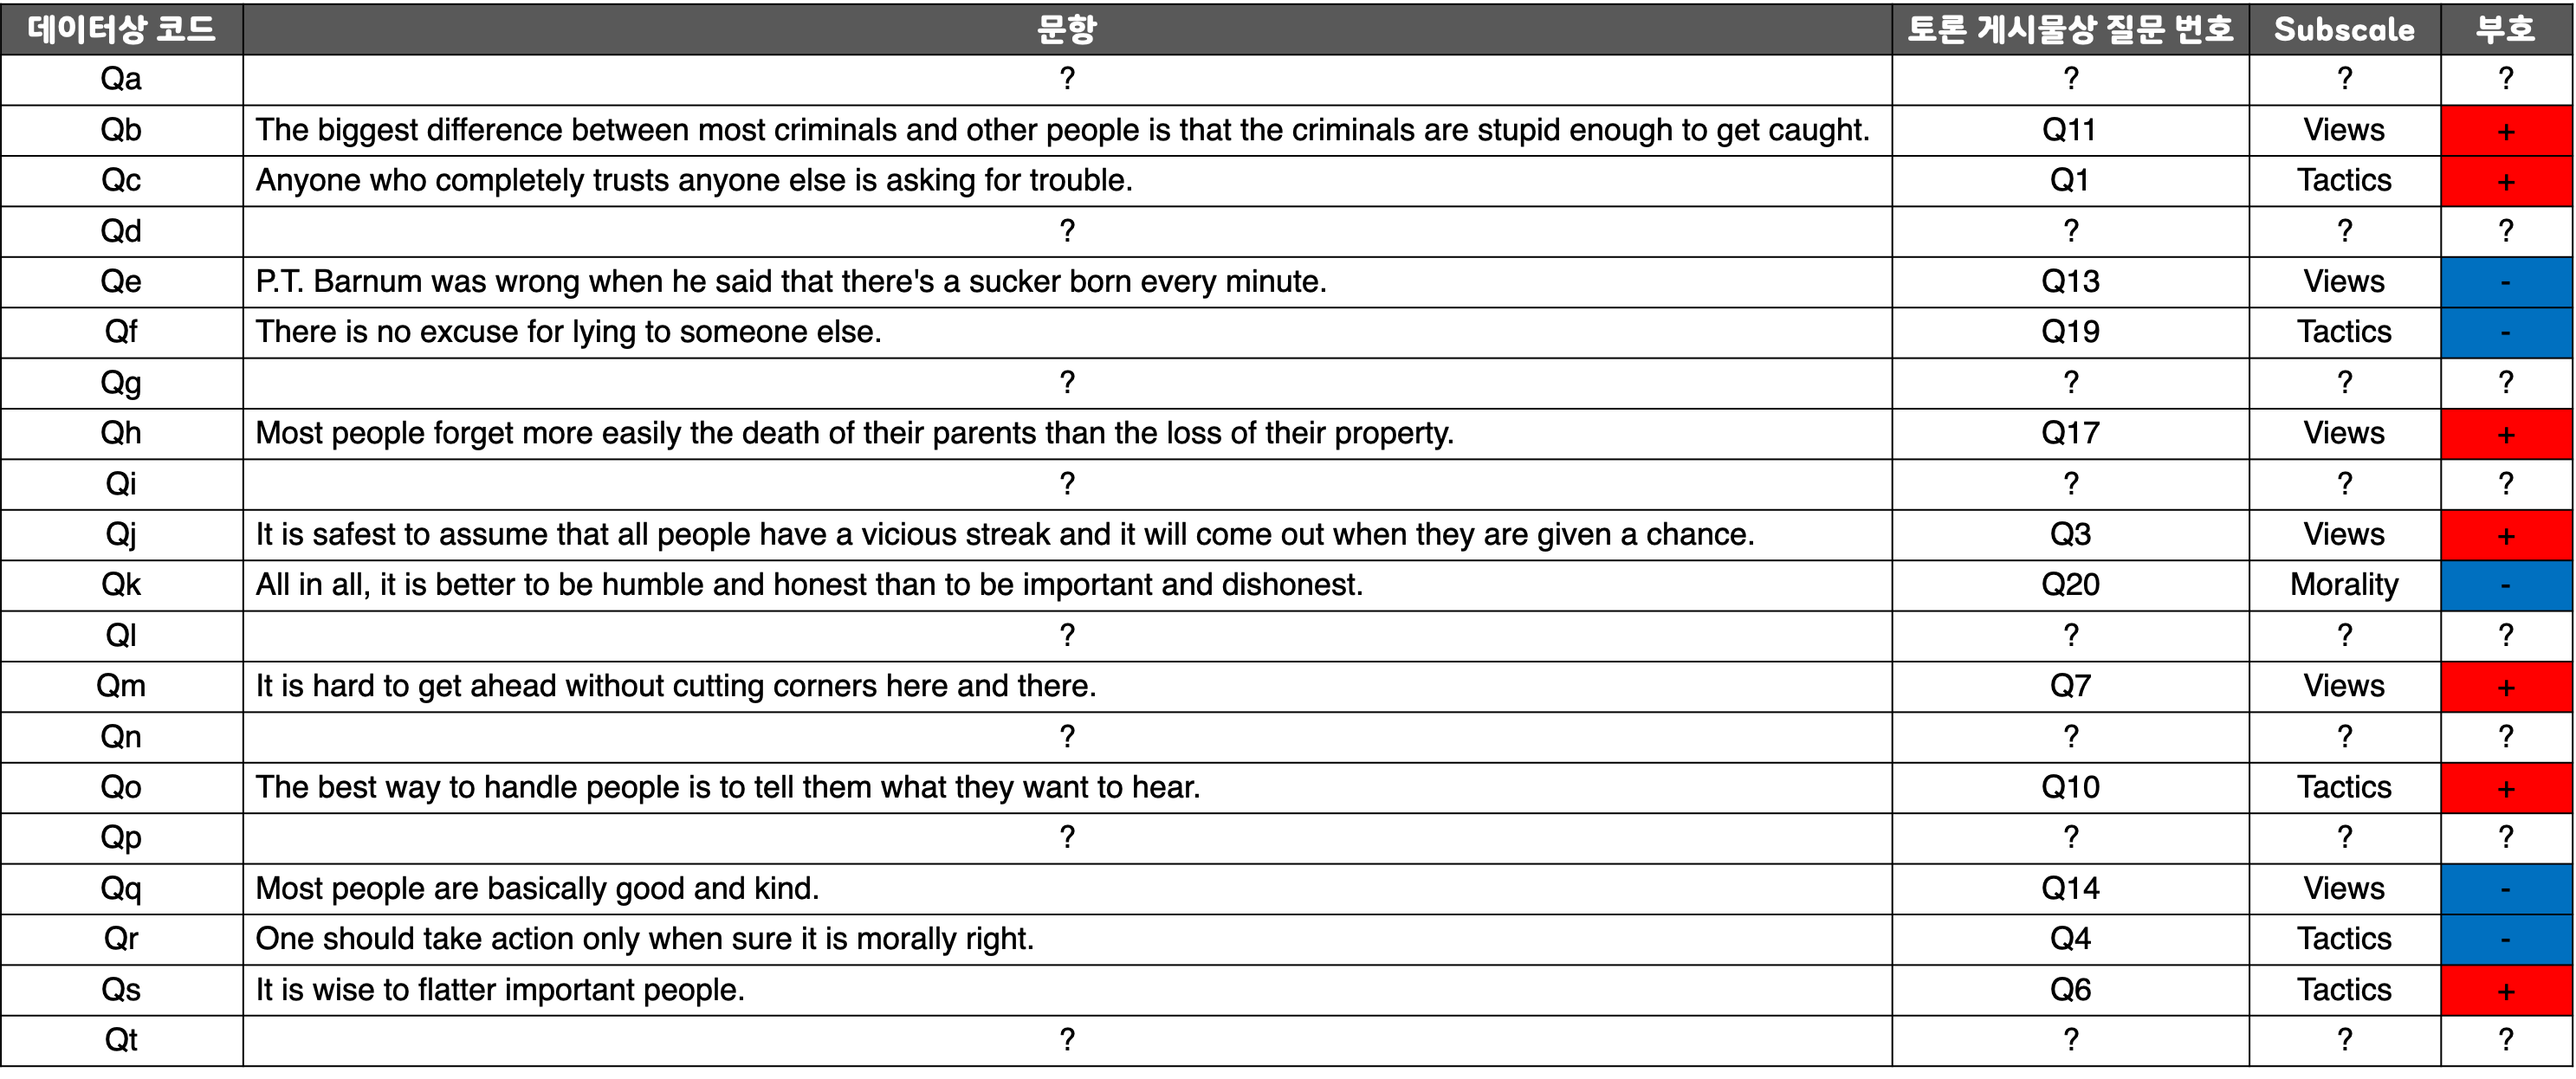

In [ ]:
Image("/content/drive/MyDrive/Picture1.png")

토론 게시물에는 있으나 데이터 변수 설명상에 Secret 처리된 8가지 문항

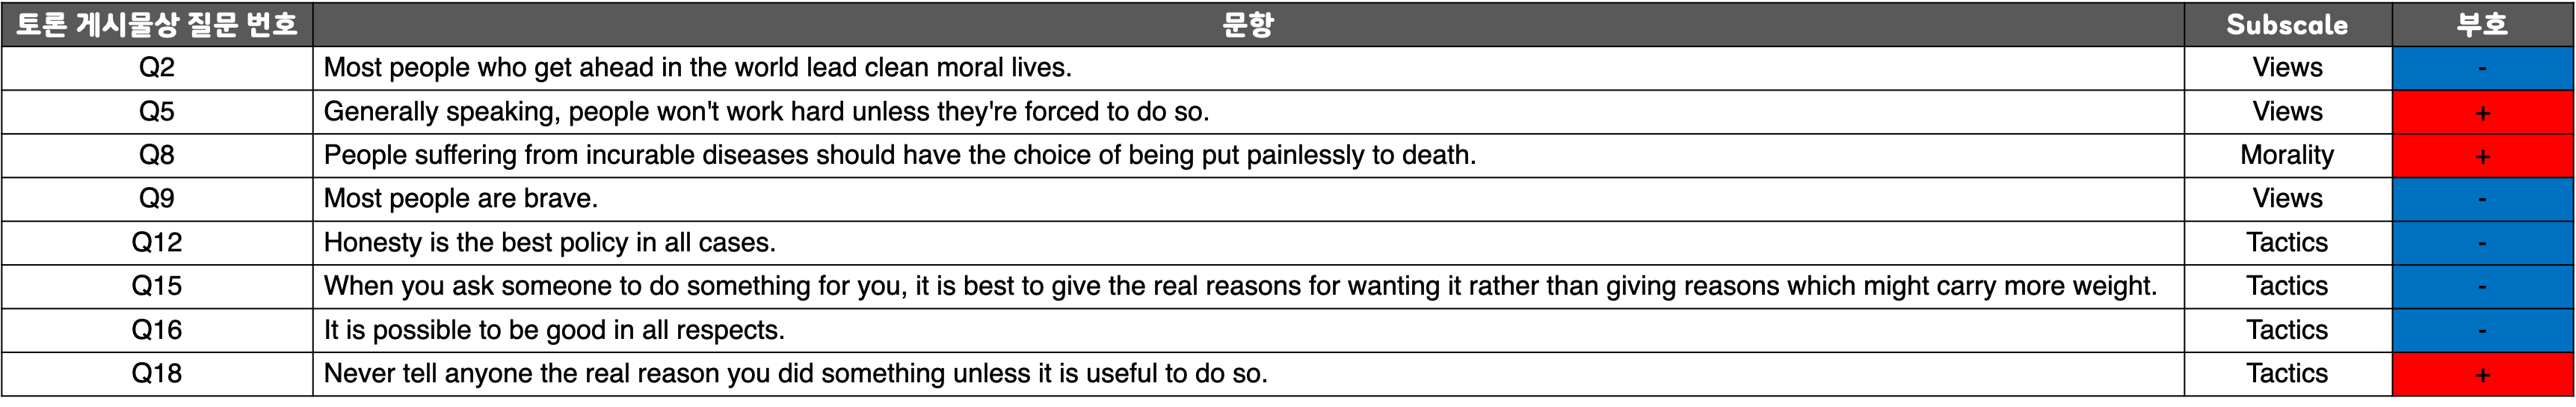

In [ ]:
Image("/content/drive/MyDrive/Picture2.png")

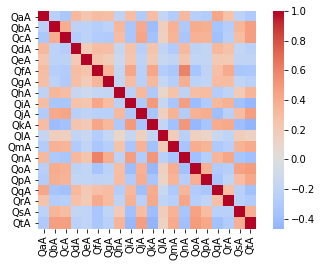

In [ ]:
#reverse 처리 안했을 경우
Answers = ['QaA', 'QbA', 'QcA', 'QdA', 'QeA',
             'QfA', 'QgA', 'QhA', 'QiA', 'QjA', 
             'QkA', 'QlA', 'QmA', 'QnA', 'QoA', 
             'QpA', 'QqA', 'QrA', 'QsA', 'QtA']

correlations = train[Answers].corr(method = 'spearman')
sns.heatmap(correlations, cmap="coolwarm", square=True, center=0)

 히트맵에서 볼 수 있듯이 부호가 같은 문항끼리는 (예를 들어 QbA와 QcA) correlation값이 양수이고, 부호가 다른 문항끼리는 (예를 들어 QbA와 QeA) correlation값이 음수

In [ ]:

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

DEVICE = 'cuda:0' if torch.cuda.is_available() else 'cpu'

In [ ]:
train.head()

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,...,hand,married,race,religion,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,voted,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13,Mach_score,Extraversion,Agreeableness,Conscientiousness,EmotionalStability,OpennesstoExperiences,wr_sum,wf_sum
0,0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,1577,5.0,539,2.0,586,4.0,1095,5.0,1142,4.0,1287,4.0,883,4.0,851,2.0,851,5.0,816,2.0,579,2.0,924,2.0,366,2.0,876,2.0,633,1.0,...,1,3,White,Other,2,6,2,7,2,7,7,4,4,5,1,2,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1,3.05,9,13,6,11,7,7,0
1,1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,4320,3.0,2190,1.0,826,1.0,4082,5.0,1867,3.0,1264,5.0,2943,4.0,3927,1.0,4329,5.0,1828,1.0,1214,5.0,2414,5.0,1356,1.0,3039,4.0,4304,1.0,...,1,1,Asian,Hindu,1,7,0,8,1,6,3,4,0,4,3,2,0,0,0,0,1,0,1,1,0,1,1,0,1,0,1,1,3.20,7,10,4,8,5,8,0
2,2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,1333,1.0,531,4.0,1167,1.0,1016,3.0,2653,2.0,1569,5.0,998,5.0,2547,2.0,918,4.0,2153,2.0,1304,1.0,1131,5.0,937,4.0,1327,1.0,1170,1.0,...,1,2,White,Other,2,5,1,3,3,4,2,2,1,5,2,1,0,0,1,1,1,0,1,1,0,1,1,1,1,0,1,1,2.80,6,7,3,4,8,10,1
3,3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,357,2.0,1519,4.0,159,3.0,2275,5.0,2809,4.0,5614,3.0,3219,4.0,1296,4.0,9046,4.0,1216,4.0,1169,4.0,23868,3.0,581,4.0,8830,4.0,2392,5.0,...,1,1,Asian,Hindu,2,4,1,7,1,5,1,5,1,5,3,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1,3.55,7,5,6,8,6,5,0
4,4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,1014,2.0,628,1.0,991,1.0,1259,5.0,1153,5.0,1388,5.0,740,5.0,1181,4.0,547,2.0,575,1.0,754,4.0,1140,5.0,323,5.0,1070,1.0,583,2.0,...,1,2,White,Agnostic,1,7,1,2,0,6,0,2,2,2,1,1,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,1,2.90,7,7,3,4,2,11,1


## 데이터 전처리

In [ ]:
for col in train[Answers]:
    print(sorted(train[col].unique()))

[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]


In [ ]:
# 마키아벨리즘 스코어
Answers = ['QaA', 'QbA', 'QcA', 'QdA', 'QeA',
             'QfA', 'QgA', 'QhA', 'QiA', 'QjA', 
             'QkA', 'QlA', 'QmA', 'QnA', 'QoA', 
             'QpA', 'QqA', 'QrA', 'QsA', 'QtA']

# -부호를 가진 문항들의 답변값을 reverse
#"QeA", "QfA", "QkA", "QqA", "QrA" 이렇게 다섯 문항은 부호가 -인 것을 이미 알고 있기 때문에 reverse 처리했습니다
flipping_columns = ["QeA", "QfA", "QkA", "QqA", "QrA"]
for flip in flipping_columns: 
    train[flip] = 6 - train[flip]

#모든 문항의 답변이 1, 2, 3, 4, 5로 되어있기 때문에 답변값을 reverse시키기 위해서는 단순히 6에서 답변값을 빼주면 됩니다.

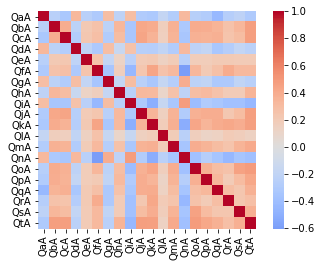

In [ ]:
correlations = train[Answers].corr(method = 'spearman')
sns.heatmap(correlations, cmap="coolwarm", square=True, center=0)

Secret이 아닌 문항들간의 관계를 살펴보았을 때 모두 다 양수 correlation을 나타내는 붉은색을 띠는 것을 볼 수 있습니다.

그리고 5개의 파란줄이 눈에 띕니다. 이는 -부호를 가진 Secret 문항수와 일치합니다. 이를 통해 "QaA", "QdA", "QgA", "QiA", "QnA" 이렇게 다섯 문항이 -부호를 가진 문항이라는 걸 알 수 있습니다.

In [ ]:
flipping_secret_columns = ["QaA", "QdA", "QgA", "QiA", "QnA"]
for flip in flipping_secret_columns: 
    train[flip] = 6 - train[flip]   



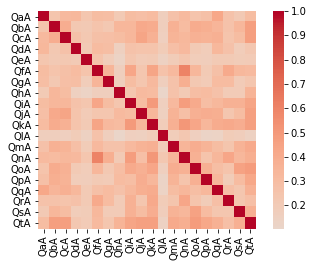

In [ ]:
correlations = train[Answers].corr(method='spearman')
sns.heatmap(correlations, cmap="coolwarm", square=True, center=0)

위와 마찬가지로 -부호인 Secret 문항("QaA", "QdA", "QgA", "QiA", "QnA")을 reverse 처리하면 마침내 모든 타일이 붉은색을 띠는 것을 볼 수 있습니다. 이를 바탕으로 마지막으로 질문을 정리하면 다음과 같습니다.

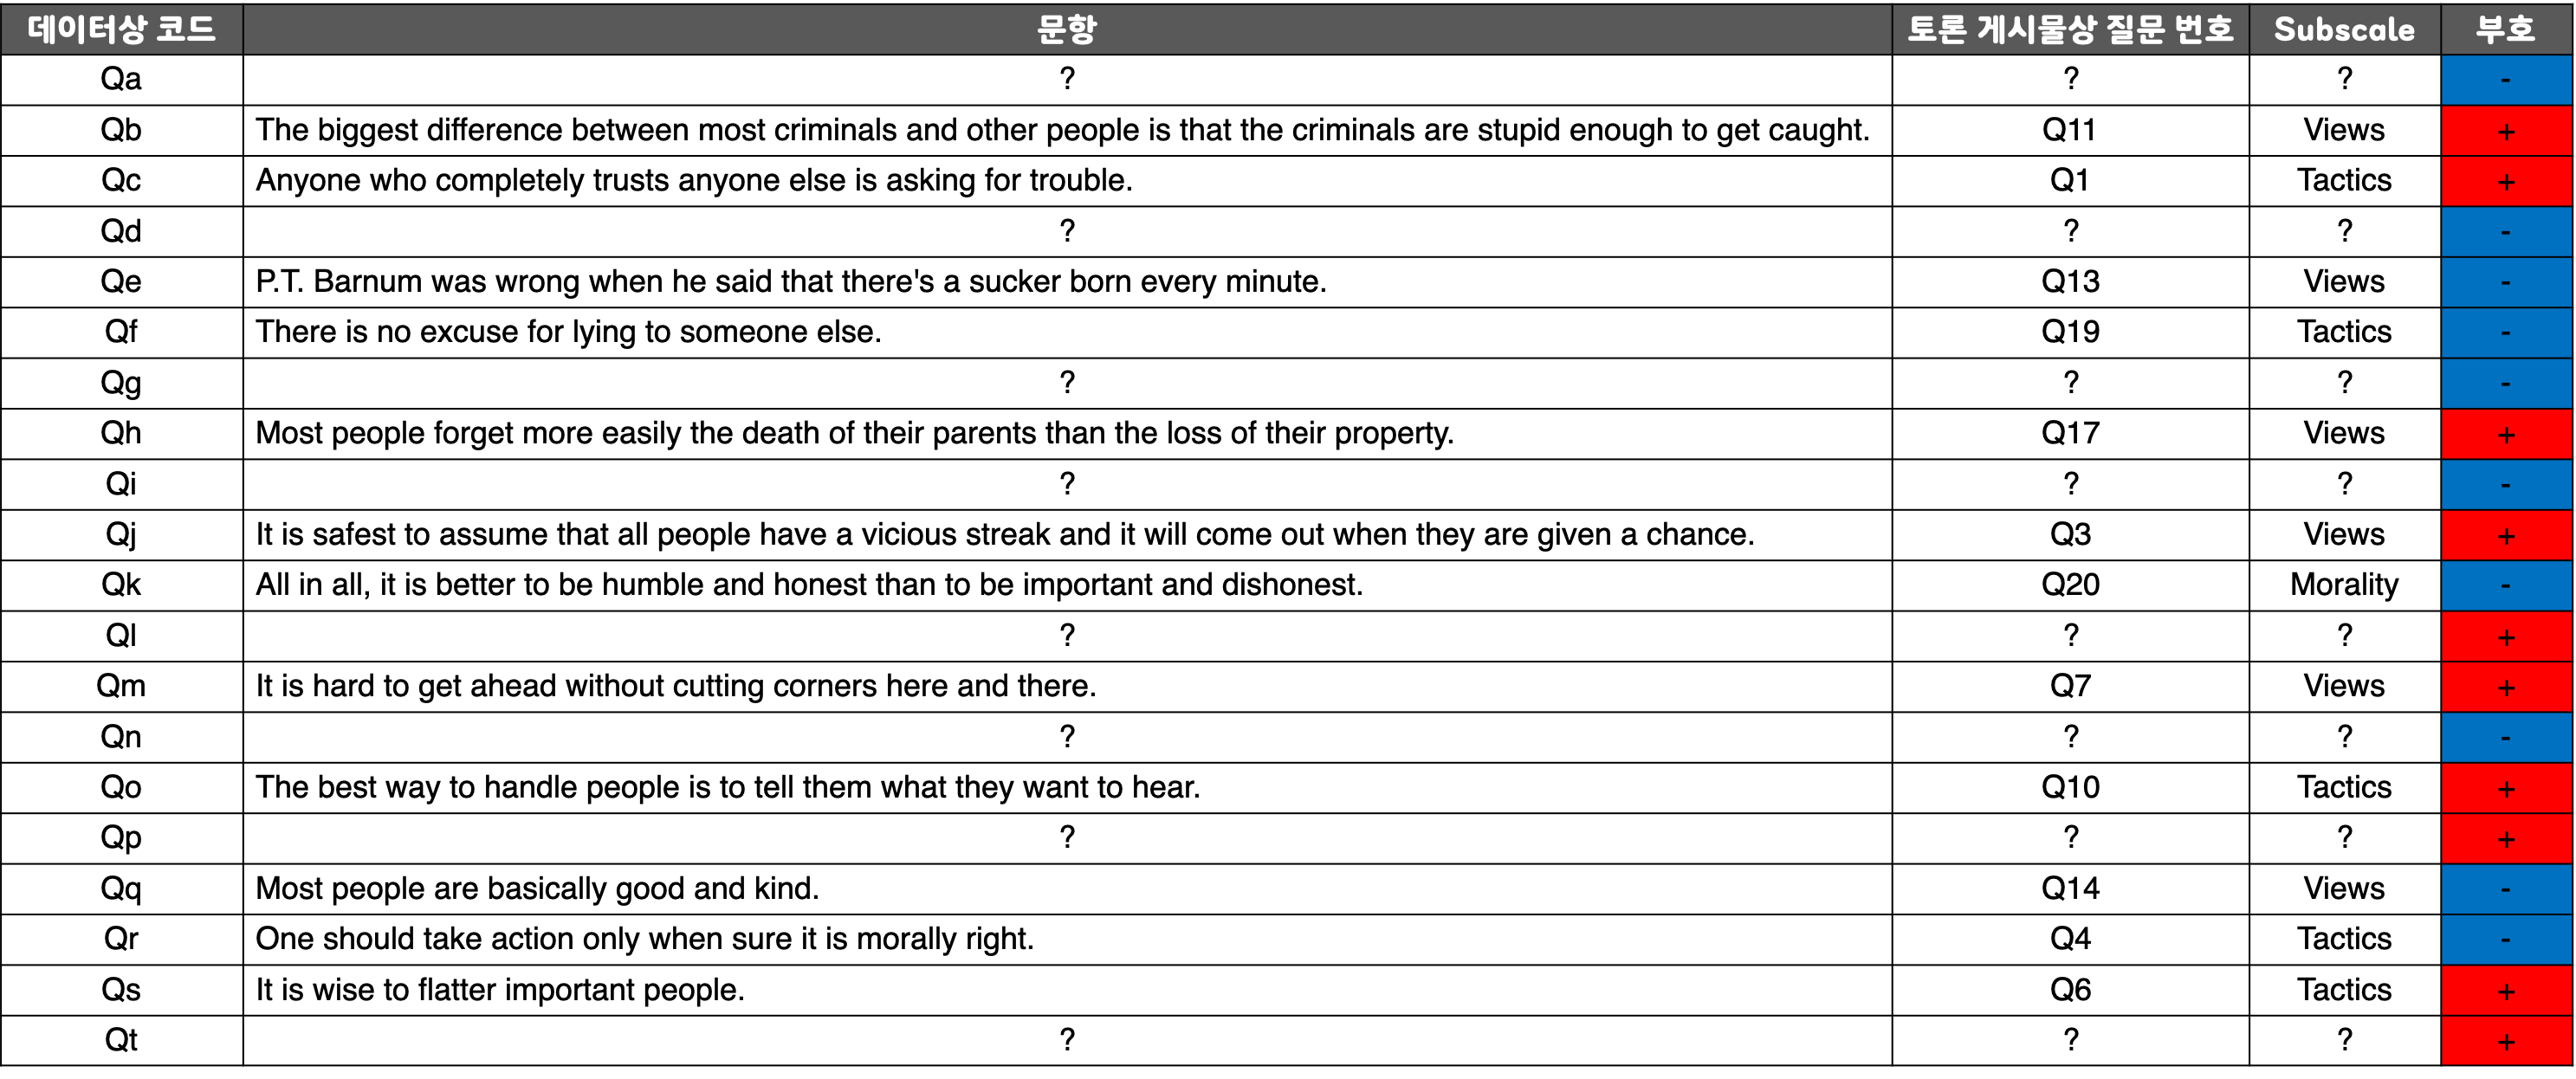

In [ ]:
Image("/content/drive/MyDrive/Picture3.png")

In [ ]:
# 마키아벨리즘 score
train['Mach_score'] = train[Answers].mean(axis = 1)
train.head()

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,age_group,education,engnat,familysize,gender,hand,married,race,religion,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,voted,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13,Mach_score
0,0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,1577,5.0,539,2.0,586,4.0,1095,5.0,1142,4.0,1287,4.0,883,4.0,851,2.0,851,5.0,816,2.0,579,2.0,924,2.0,366,2.0,876,2.0,633,1.0,1115,30s,2,1,4,Female,1,3,White,Other,2,2,2,1,2,1,7,4,4,3,1,2,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1,3.05
1,1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,4320,3.0,2190,1.0,826,1.0,4082,5.0,1867,3.0,1264,5.0,2943,4.0,3927,1.0,4329,5.0,1828,1.0,1214,5.0,2414,5.0,1356,1.0,3039,4.0,4304,1.0,1346,20s,4,2,3,Female,1,1,Asian,Hindu,1,1,0,0,1,2,3,4,0,4,3,2,0,0,0,0,1,0,1,1,0,1,1,0,1,0,1,1,3.20
2,2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,1333,1.0,531,4.0,1167,1.0,1016,3.0,2653,2.0,1569,5.0,998,5.0,2547,2.0,918,4.0,2153,2.0,1304,1.0,1131,5.0,937,4.0,1327,1.0,1170,1.0,1409,30s,3,1,3,Male,1,2,White,Other,2,3,1,5,3,4,2,6,1,3,2,1,0,0,1,1,1,0,1,1,0,1,1,1,1,0,1,1,2.80
3,3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,357,2.0,1519,4.0,159,3.0,2275,5.0,2809,4.0,5614,3.0,3219,4.0,1296,4.0,9046,4.0,1216,4.0,1169,4.0,23868,3.0,581,4.0,8830,4.0,2392,5.0,1312,20s,4,2,0,Female,1,1,Asian,Hindu,2,4,1,1,1,3,1,3,1,3,3,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1,3.55
4,4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,1014,2.0,628,1.0,991,1.0,1259,5.0,1153,5.0,1388,5.0,740,5.0,1181,4.0,547,2.0,575,1.0,754,4.0,1140,5.0,323,5.0,1070,1.0,583,2.0,1889,20s,3,1,2,Male,1,2,White,Agnostic,1,1,1,6,0,2,0,6,2,6,1,1,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,1,2.90


In [ ]:
train[['Mach_score']].describe()

,Mach_score
count,45532.000000
mean,2.971852
std,0.356195
min,1.000000
25%,2.750000
50%,2.950000
75%,3.200000
max,5.000000


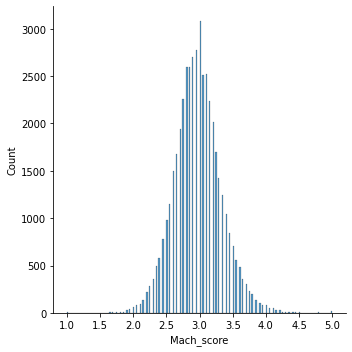

In [ ]:
sns.displot(train, x="Mach_score", bins=200)

https://dacon.io/competitions/official/235647/talkboard/401589?page=1&dtype=recent TIPI(Ten-Item Personality Inventory) 계산법 공유

In [ ]:

# Tipi
Answers2 = ['tp01', 'tp02', 'tp03', 'tp04', 'tp05', 'tp06', 'tp07', 'tp08', 'tp09', 'tp10']

# -부호를 가진 문항들의 답변값을 reverse
flipping_columns2 = ['tp02', 'tp04', 'tp06', 'tp08', 'tp10']
for flip in flipping_columns2: 
    train[flip] = 8 - train[flip]

# TIPI 점수
train['Extraversion'] = train['tp01'] + train['tp06'] 
train['Agreeableness'] = train['tp02'] + train['tp07']
train['Conscientiousness'] = train['tp03'] + train['tp08']
train['EmotionalStability'] = train['tp04'] + train['tp09'] 
train['OpennesstoExperiences'] = train['tp05'] + train['tp10']


# wr 질문 합계
wr_c = ['wr_01', 'wr_02', 'wr_03', 'wr_04', 'wr_05', 'wr_06', 'wr_07', 'wr_08', 'wr_09', 'wr_10', 'wr_11','wr_12', 'wr_13']
train['wr_sum'] = train[wr_c].sum(axis=1)

# wf 질문 합계
wf_c = ['wf_01', 'wf_02', 'wf_03']
train['wf_sum'] = train[wf_c].sum(axis=1) 

# familysize
train.loc[train['familysize'] > 12, 'familysize'] = 12

In [ ]:
# test data도 같은 처리

# 마키아벨리즘 테스트 score
for flip in flipping_columns: 
    test[flip] = 6 - test[flip]

for flip in flipping_secret_columns: 
    test[flip] = 6 - test[flip] 

test['Mach_score'] = test[Answers].mean(axis = 1) 

# TIPI 점수
for flip in flipping_columns2: 
    test[flip] = 8 - test[flip]

test['Extraversion'] = test['tp01'] + test['tp06'] 
test['Agreeableness'] = test['tp02'] + test['tp07']
test['Conscientiousness'] = test['tp03'] + test['tp08'] 
test['EmotionalStability'] = test['tp04'] + test['tp09'] 
test['OpennesstoExperiences'] = test['tp05'] + test['tp10'] 

# 
test['wr_sum'] = test[wr_c].sum(axis=1) 
test['wf_sum'] = test[wf_c].sum(axis=1) 

# familysize
test.loc[test['familysize'] > 12, 'familysize'] = 12

In [ ]:
train.columns

Index(['index', 'QaA', 'QaE', 'QbA', 'QbE', 'QcA', 'QcE', 'QdA', 'QdE', 'QeA',
       'QeE', 'QfA', 'QfE', 'QgA', 'QgE', 'QhA', 'QhE', 'QiA', 'QiE', 'QjA',
       'QjE', 'QkA', 'QkE', 'QlA', 'QlE', 'QmA', 'QmE', 'QnA', 'QnE', 'QoA',
       'QoE', 'QpA', 'QpE', 'QqA', 'QqE', 'QrA', 'QrE', 'QsA', 'QsE', 'QtA',
       'QtE', 'age_group', 'education', 'engnat', 'familysize', 'gender',
       'hand', 'married', 'race', 'religion', 'tp01', 'tp02', 'tp03', 'tp04',
       'tp05', 'tp06', 'tp07', 'tp08', 'tp09', 'tp10', 'urban', 'voted',
       'wf_01', 'wf_02', 'wf_03', 'wr_01', 'wr_02', 'wr_03', 'wr_04', 'wr_05',
       'wr_06', 'wr_07', 'wr_08', 'wr_09', 'wr_10', 'wr_11', 'wr_12', 'wr_13',
       'Mach_score', 'Extraversion', 'Agreeableness', 'Conscientiousness',
       'EmotionalStability', 'OpennesstoExperiences', 'wr_sum', 'wf_sum'],
      dtype='object')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45532 entries, 0 to 45531
Data columns (total 86 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  45532 non-null  int64  
 1   QaA                    45532 non-null  float64
 2   QaE                    45532 non-null  int64  
 3   QbA                    45532 non-null  float64
 4   QbE                    45532 non-null  int64  
 5   QcA                    45532 non-null  float64
 6   QcE                    45532 non-null  int64  
 7   QdA                    45532 non-null  float64
 8   QdE                    45532 non-null  int64  
 9   QeA                    45532 non-null  float64
 10  QeE                    45532 non-null  int64  
 11  QfA                    45532 non-null  float64
 12  QfE                    45532 non-null  int64  
 13  QgA                    45532 non-null  float64
 14  QgE                    45532 non-null  int64  
 15  Qh

In [ ]:
from sklearn.preprocessing import StandardScaler

drop_list = ['index', 'hand']             

# familysize 도 dummies 처리하였습니다.
replace_dict = {'education': str, 'engnat': str, 'married': str, 'urban': str, 'familysize': str}

train_y = train['voted']
train_x = train.drop(drop_list + ['voted'], axis=1)
test_x = test.drop(drop_list , axis=1)

train_x = train_x.astype(replace_dict)
test_x = test_x.astype(replace_dict)
#원핫인코딩
train_x = pd.get_dummies(train_x)
test_x = pd.get_dummies(test_x)

train_y = 2 - train_y.to_numpy()


#Feature Scaling : 특정 값의 범위를 균일하게 맞춰주는 작업
#(특정 데이터 폭이 너무 좁거나 넓은 데이터를 적당한 범위로 조정)

scaler = StandardScaler()
scaler.fit(train_x)#평균과 표준편차 계산
train_x = scaler.transform(train_x)#정규화/표준화
scaler.fit(test_x)
test_x = scaler.transform(test_x)
#torch.tensor 함수는 data를 Tensor 객체로 만들어주는 함수
train_y = torch.tensor(train_y, dtype=torch.float32)
train_x = torch.tensor(train_x, dtype=torch.float32)
test_x = torch.tensor(test_x, dtype=torch.float32)
train_len, test_len = len(train_x), len(test_x)

print(train_x.shape, test_x.shape)

torch.Size([45532, 131]) torch.Size([11383, 131])


## model

- 모델을 넓게 깊게 쌓아보았습니다.
- 과적합을 방지하기 위해서 dropout 많이 하였습니다.

In [ ]:
%%time

N_MODEL = 5#생성할 모델의 갯수

N_EPOCH = 20
BATCH_SIZE = 128
LOADER_PARAM = {
    'batch_size': BATCH_SIZE,
    'num_workers': 4,
    'pin_memory': True
}
prediction = np.zeros((11383, 1), dtype=np.float32)

for no in range(N_MODEL):

    train_loader = DataLoader(TensorDataset(train_x, train_y),
                              shuffle=True, drop_last=True, **LOADER_PARAM)
    test_loader = DataLoader(TensorDataset(test_x, torch.zeros((test_len,), dtype=torch.float32)),
                             shuffle=False, drop_last=False, **LOADER_PARAM)
    model = nn.Sequential(
        
        nn.Dropout(0.1),

        nn.Linear(131, 140, bias=False),
        nn.LeakyReLU(0.05, inplace=True),
        nn.Dropout(0.5),

        nn.Linear(140, 160, bias=False),
        nn.LeakyReLU(0.05, inplace=True),
        nn.Dropout(0.2),

        nn.Linear(160, 124, bias=False),
        nn.LeakyReLU(0.05, inplace=True),
        nn.Dropout(0.2),

        nn.Linear(124, 100, bias=False),
        nn.LeakyReLU(0.05, inplace=True),
        nn.Dropout(0.2),

        nn.Linear(100, 80, bias=False),
        nn.LeakyReLU(0.05, inplace=True),
        nn.Dropout(0.1),

        nn.Linear(80, 62, bias=False),
        nn.LeakyReLU(0.05, inplace=True),
        nn.Dropout(0.1),

        nn.Linear(62, 36, bias=False),
        nn.LeakyReLU(0.05, inplace=True),
        nn.Dropout(0.05),

        nn.Linear(36, 18, bias=False),
        nn.LeakyReLU(0.05, inplace=True),

        nn.Linear(18, 9, bias=False),
        nn.ReLU(inplace=True),
        nn.Linear(9, 1)
    ).to(DEVICE)

    criterion = torch.nn.BCEWithLogitsLoss(pos_weight=torch.tensor([1.20665], device=DEVICE))
    optimizer = optim.AdamW(model.parameters(), lr=1e-3, weight_decay=4e-2)
    scheduler = optim.lr_scheduler.CosineAnnealingWarmRestarts(
        optimizer, T_0=N_EPOCH // 4, eta_min=1.2e-5)

    model.train()
    for epoch in tqdm(range(N_EPOCH), desc='{:02d}/{:02d}'.format(no + 1, N_MODEL)):
        for idx, (xx, yy) in enumerate(train_loader):
            optimizer.zero_grad()
            xx, yy = xx.to(DEVICE), yy.to(DEVICE)
            pred = model(xx).squeeze()
            loss = criterion(pred, yy)
            loss.backward()
            optimizer.step()
            scheduler.step(epoch + idx / len(train_loader))

    model.eval()
    with torch.no_grad():
        for idx, (xx, _) in enumerate(test_loader):
            xx = xx.to(DEVICE)
            pred = (2. - torch.sigmoid(model(xx).detach().to('cpu'))).numpy()
            prediction[BATCH_SIZE * idx:min(BATCH_SIZE * (idx + 1), len(prediction)), :] \
                += pred[:, :] / N_MODEL

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
05/05: 100%|██████████| 20/20 [01:04<00:00,  3.20s/it]


CPU times: user 5min 6s, sys: 42.3 s, total: 5min 48s
Wall time: 5min 20s


In [ ]:
prediction

array([[1.5677197],
       [1.8956721],
       [1.4256918],
       ...,
       [1.1899744],
       [1.3454548],
       [1.6807011]], dtype=float32)

In [ ]:
submission.iloc[:, 1:] = prediction
submission.to_csv('submission-nn-{}.csv'.format(datetime.now().strftime('%m%d-%H%M')), index=False)

참고 코드 
https://dacon.io/competitions/official/235647/codeshare/1814?page=2&dtype=recent

##서포트 벡터 머신

https://github.com/castleroad95/voting_psychology/blob/master/%ED%88%AC%ED%91%9C%20%EC%8B%AC%EB%A6%AC%20Data%20%EB%B6%84%EC%84%9D.ipynb

https://bkshin.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-2%EC%84%9C%ED%8F%AC%ED%8A%B8-%EB%B2%A1%ED%84%B0-%EB%A8%B8%EC%8B%A0-SVM